## Observations and Insights 

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')
mouse_study_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
counted_mouse = mouse_study_df['Mouse ID'].nunique()
counted_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mouse_study_df = mouse_study_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False)
updated_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_study_df['Mouse ID'].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
group_study_gby_df = updated_mouse_study_df.groupby(['Drug Regimen'])

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# grouped_by_mouse_study_df = updated_mouse_study_df.groupby(['Drug Regimen']).count()

mean_s = group_study_gby_df['Tumor Volume (mm3)'].mean()
median_s = group_study_gby_df['Tumor Volume (mm3)'].median()
variance_s = group_study_gby_df['Tumor Volume (mm3)'].var()
standard_dev_s = group_study_gby_df['Tumor Volume (mm3)'].std()
sem_s = group_study_gby_df['Tumor Volume (mm3)'].sem()
#mode_drug_reg = sts.mode(updated_mouse_study_df['Tumor Volume (mm3)'])


# This method is the most straighforward, creating multiple series 
# and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

summary_statistics = pd.DataFrame({"Mean" : mean_s, "Median" : median_s,
                                             "Variance" : variance_s, 
                                             "Standard Dev" : standard_dev_s, 
                                             "SEM" : sem_s})
summary_statistics


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

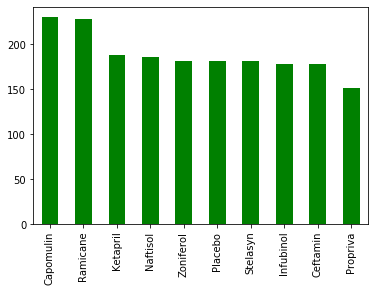

In [9]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pandas 

letsMakeABarPlot = updated_mouse_study_df['Drug Regimen'].value_counts()
letsMakeABarPlot.plot.bar(color = 'green')



<BarContainer object of 10 artists>

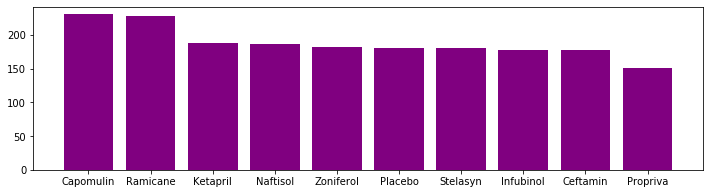

In [10]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot
plt.figure(figsize = (12,3))
plt.bar(letsMakeABarPlot.index, letsMakeABarPlot, color = 'purple')


## Pie Plots

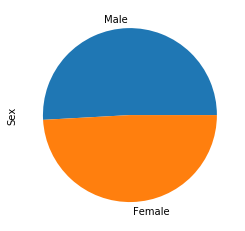

In [11]:
# Generate a pie plot showing the distribution of female versus 
# male mice using pandas

female_male_ratio = updated_mouse_study_df['Sex'].value_counts()
female_male_ratio.plot.pie()

([<matplotlib.patches.Wedge at 0x16b9e951848>,
 [Text(-0.030277540496140426, 1.099583225836728, 'Male'),
  Text(0.030277540496140783, -1.099583225836728, 'Female')])

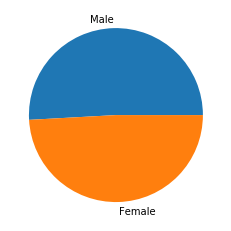

In [12]:
# Generate a pie plot showing the distribution of female versus 
# male mice using pyplot
# bar(x, height, width=0.8, bottom=None, \*, align='center', data=None, \*\*kwargs
labels = 'Male', 'Female'
female_male_ratio = updated_mouse_study_df['Sex'].value_counts()
plt.pie(female_male_ratio.values, labels = labels)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across 
# four of the most promising treatment regimens. 
a_dataframe = pd.DataFrame({"Index": updated_mouse_study_df['Drug Regimen'], "Range": updated_mouse_study_df['Tumor Volume (mm3)']})
max_index = a_dataframe["Range"].idxmax()
max_row = a_dataframe.iloc[[max_index]]
max_row
# Calculate the IQR and quantitatively determine if there 
# are any potential outliers. 

### I don't remember how I did this one. ### 


,Index,Range
380,Ketapril,78.567014


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,m601,45,28.430964,1,Male,22,17
Ceftamin,t573,0,45.000000,0,Female,15,27
Infubinol,f345,45,60.918767,1,Male,23,26
Ketapril,l264,10,50.659581,0,Female,15,30
Naftisol,j755,45,69.563621,1,Male,23,27
Placebo,t994,20,56.527952,1,Male,14,30
Propriva,c927,40,64.183229,4,Female,4,26
Ramicane,i334,45,36.374510,2,Female,8,20
Stelasyn,o848,0,45.000000,0,Female,14,27


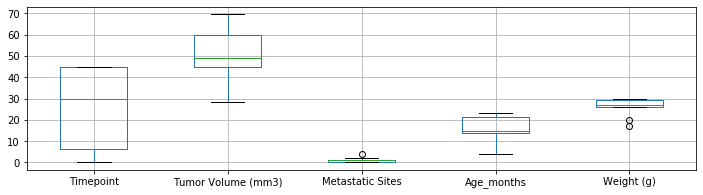

In [14]:
# Generate a box plot of the final tumor volume of each mouse 
# across four regimens of interest
last_mouse = group_study_gby_df.last()
plt.figure(figsize = (12,3))
last_mouse.boxplot()
last_mouse

## Line and Scatter Plots

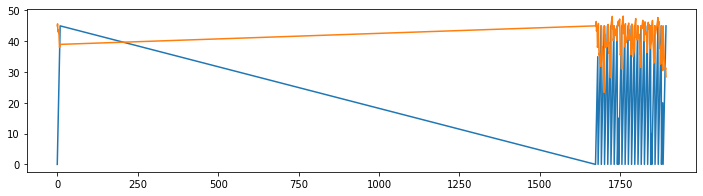

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = updated_mouse_study_df[updated_mouse_study_df["Drug Regimen"] == "Capomulin"]
plt.figure(figsize = (12,3))
capomulin_treatment['Timepoint'].plot.line()
capomulin_treatment['Tumor Volume (mm3)'].plot.line()


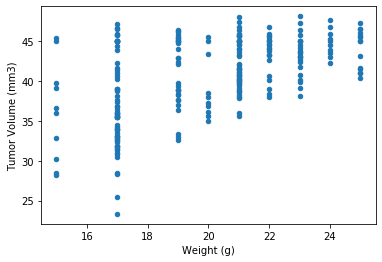

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

printme = capomulin_treatment[["Weight (g)", 'Tumor Volume (mm3)']]
printme.plot.scatter("Weight (g)", 'Tumor Volume (mm3)')


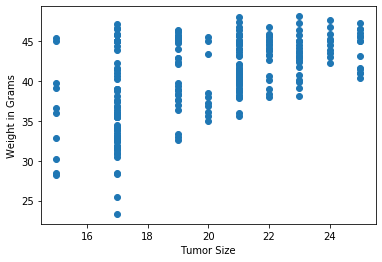

In [17]:
#plt.scatter(updated_mouse_study_df[updated_mouse_study_df["Drug Regimen"] == "Capomulin"],
#            updated_mouse_study_df['Tumor Volume (mm3)'])
x_values = capomulin_treatment['Weight (g)']
y_values = capomulin_treatment['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Size')
plt.ylabel('Weight in Grams')
plt.show()
#This is probably the right way that I attempted before, but I forget the exact way.

## Correlation and Regression

In [1]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#linregress = {"Key": '', "Value": ''}
x_values = capomulin_treatment['Weight (g)']
y_values = capomulin_treatment['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()




NameError: name 'capomulin_treatment' is not defined